In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os.path as path
from scipy.constants import pi, e, hbar, m_e, epsilon_0

In [38]:
filepath = '/home/kristor/Work/Vacuum-MD/data/Checkerboard/100nm_X_100nm/4.65-25--4.70-75/out/'
filename_ramo = path.join(filepath, 'ramo_current.dt') # Ramo current
data = np.loadtxt(filename_ramo)
#cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, ((ramo_current_emit(j,i)/cur_scale, j=1, MAX_SECTIONS), i = 1, nrEmit)
cur_time = data[:, 0]
step = data[:, 1]
ramo_cur = data[:, 2]
#V_d = data[:, 3]
nrPart = data[:, 4]
#nrElec = data[:, 5]
#nrHole = data[:, 6]
ramo_cur_sec_1 = data[:, 7]
ramo_cur_sec_2 = data[:, 8]
ramo_cur_sec_3 = data[:, 9]
ramo_cur_sec_4 = data[:, 10]
ramo_cur_sec_5 = data[:, 11]
ramo_cur_sec_6 = data[:, 12]
ramo_cur_sec_7 = data[:, 13]
ramo_cur_sec_8 = data[:, 14]
ramo_cur_sec_9 = data[:, 15]
ramo_cur_sec_10 = data[:, 16]
ramo_cur_sec_11 = data[:, 17]
ramo_cur_sec_12 = data[:, 18]
ramo_cur_sec_13 = data[:, 19]
ramo_cur_sec_14 = data[:, 20]
ramo_cur_sec_15 = data[:, 21]
ramo_cur_sec_16 = data[:, 22]

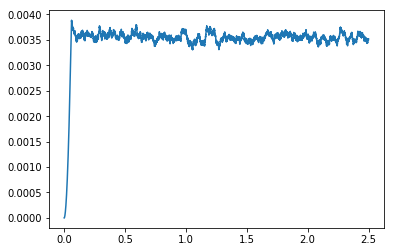

In [39]:
plt.plot(cur_time, ramo_cur)

In [40]:
center_sec = ramo_cur_sec_6 + ramo_cur_sec_7 + ramo_cur_sec_10 + ramo_cur_sec_11
outside_sec = ramo_cur_sec_1 + ramo_cur_sec_2 + ramo_cur_sec_3 + ramo_cur_sec_4 \
            + ramo_cur_sec_5 + ramo_cur_sec_8 + ramo_cur_sec_9 + ramo_cur_sec_12 \
            + ramo_cur_sec_13 + ramo_cur_sec_14 + ramo_cur_sec_15 + ramo_cur_sec_16

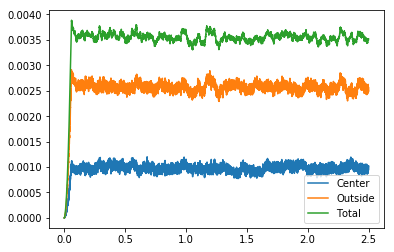

In [41]:
plt.plot(cur_time, center_sec, \
         cur_time, outside_sec, \
         cur_time, ramo_cur)
plt.legend(['Center', 'Outside', 'Total'])

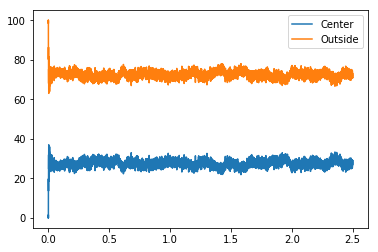

In [42]:
center_per = center_sec/ramo_cur
outside_per = outside_sec/ramo_cur
plt.plot(cur_time, center_per*100, \
         cur_time, outside_per*100)
plt.legend(['Center', 'Outside'])

In [43]:
center_mean = np.mean(center_per)
outside_mean = np.mean(outside_per)
print(center_mean)
print(outside_mean)

0.27492611481309087
0.7250744147948182


In [45]:
a_FN = e**2/(16.0*pi**2*hbar) # A eV V^{-2}
b_FN = -4.0/(3.0*hbar) * np.sqrt(2.0*m_e*e) # eV^{-3/2} V m^{-1}
l_const = e / (4.0*pi*epsilon_0) # eV^{2} V^{-1} m

In [47]:
w_theta = 4.65 # work function in eV
time_step = 0.25E-15 # Time step in sec

V = 20.0E3 # Voltage
d = 2500.0E-9 # Gap spacing
L = 100.0E-9 #Side length of emitter

F = -V/d # Electric Field
A = L**2 # Area of emitter

In [48]:
def t_y(float: F) -> float:
    l = l_const * (-1.0*F) / w_theta**2 # l = y^2, y = 3.79E-4 * sqrt(F_old) / w_theta
    t_y = 1.0 + l*( 1.0/9.0 - 1.0/18.0*np.log(l) )
    return t_y

def v_y(float: F) -> float:
    l = l_const * (-1.0*F) / w_theta**2 # l = y^2, y = 3.79E-4 * sqrt(F_old) / w_theta
    v_y = 1.0 - l + 1.0/6.0 * l * np.log(l)
    return v_y

def FN_current(A, w_theta):
    